In [1]:
import pandas as pd
import numpy as np
import math
import pickle
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import re

### Auxiliary functions

In [2]:
def format_equation(str_equ, exp = 'x', var = 'x'):
    strOut = re.sub(r"{}".format(var), "({})".format(var), str_equ)
    strOut = re.sub(r"(?<=[A-Za-z0-9\)])(\({}\))".format(var), "*({})".format(var), strOut)
    strOut = re.sub(r"(?<=[0-9])\(", "*(", strOut)
    strOut = re.sub(r"(\^\({}\))".format(var), "**({})".format(var), strOut)
    strOut = re.sub(r"(\({}\))".format(var), "({})".format(exp), strOut)
    strOut = re.sub(r"\^", "**", strOut)
    
    strOut = re.sub(r"e", "math.e", strOut)
    strOut = re.sub(r"pi", "math.pi", strOut)
    strOut = re.sub(r"sin", "math.sin", strOut)
    strOut = re.sub(r"cos", "math.cos", strOut)
    strOut = re.sub(r"tan", "math.tan", strOut)
    strOut = re.sub(r"(?<=[A-Za-z0-9\)])(math.)", "*math.", strOut)
    return strOut

In [3]:
def format_secondVar(str_equ, var):
    strOut = re.sub(r"(?<=[A-Za-z0-9\)])({})".format(var), "*({})".format(var), str_equ)
    return strOut

In [4]:
#format_equation("2x^5+ 3x + x^2 + e^x + 3xy + 3sin(y) - 4cos(x) + 100(x + y)", 'x + h', 'y')
#format_equation("1/2x^TQx + c^Tx", 'x + h', 'x')

In [5]:
#format_secondVar("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + y^4", 'x')

In [6]:
def evaluate_Fx(str_equ, x):
    x = float(x)
    strOut = format_equation(str_equ, 'x')
    result = eval(strOut)
    return result

In [7]:
def finite_derivative(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = f3 = '(' +  str_equ + ')'
    
    f1 = format_equation(f1, 'x + 2*h')
    f2 = format_equation(f2, 'x + h')
    f3 = format_equation(f3, 'x')
      
    strOut = '(' + f1 + ' - 4 * ' + f2 + ' + 3 *' + f3 + ')' + ' / (2 * h)'
    result = eval(strOut)
    return result

## Lab1 Functions (derivatives)

#### R1 functions

In [8]:
def center_finite_derivative(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = '(' +  str_equ + ')'
    
    f1 = format_equation(f1, 'x + h')
    f2 = format_equation(f2, 'x - h')
      
    strOut = '(' + f1 + ' - ' + f2 + ')' + ' / (2 * h)'
    result = eval(strOut)
    return np.array(result, dtype = np.float32)

In [9]:
def progressive_finite_derivative(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = f3 = '(' +  str_equ + ')'
   
    f1 = format_equation(f1, 'x')
    f2 = format_equation(f2, 'x + h')
    f3 = format_equation(f3, 'x + 2*h')
      
    strOut = '( -3 * ' + f1 + ' + 4 * ' + f2 + ' - ' + f3 + ')' + ' / (2 * h)'
    result = eval(strOut)
    return np.array(result, dtype = np.float32)

In [10]:
def center_finite_derivative_2(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = f3 = f4 = '(' +  str_equ + ')'
    
    f1 = format_equation(f1, 'x + h')
    f2 = format_equation(f2, 'x - h')   
    f3 = format_equation(f3, 'x + 2*h')   
    f4 = format_equation(f4, 'x - 2*h')   
      
    strOut = '(' + f4 + ' - 8 * ' + f2 + ' + 8 * ' + f1 + ' - ' + f3 + ')' + ' / (12 * h)'
    result = eval(strOut)
    return np.array(result, dtype = np.float32)

In [11]:
#center_finite_derivative("2x^5 - 3", 1, 2)

In [12]:
#progressive_finite_derivative("2x^5 - 3", 1, 2)

In [13]:
#center_finite_derivative_2("2x^5 - 3", 1, 2)

#### R2 Functions

In [14]:
def center_finite_derivative_r2(str_equ, p, h):
    x = float(p[0])
    y = float(p[1])
    h = float(h)
    
    str_parciales = []
    for var in ['x', 'y']:
        #equ = str_equ.replace('y', '*(y)') if var == 'x' else str_equ.replace('x', '*(x)')
        equ = format_secondVar(str_equ, 'y') if var == 'x' else format_secondVar(str_equ, 'x')
        f1 = f2 = '(' +  equ + ')'
 
        f1 = format_equation(f1, var + ' + h', var)   
        f2 = format_equation(f2, var + ' - h', var)   
      
        strOut = '(' + f1 + ' - ' + f2 + ')' + ' / (2 * h)'
        str_parciales.append(strOut)
    
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, {'x': x, 'y': y, 'h': h}) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [15]:
def progressive_finite_derivative_r2(str_equ, p, h):
    x = float(p[0])
    y = float(p[1])
    h = float(h)
     
    str_parciales = []
    for var in ['x', 'y']:
        equ = format_secondVar(str_equ, 'y') if var == 'x' else format_secondVar(str_equ, 'x')
        f1 = f2 = f3 = '(' +  equ + ')'
   
        f1 = format_equation(f1, var, var)   
        f2 = format_equation(f2, var + '+ h', var)   
        f3 = format_equation(f3, var + ' + 2*h', var)   
        
        strOut = '(-3 * ' + f1 + ' + 4 * ' + f2 + ' - ' + f3 + ')' + ' / (2 * h)'
        str_parciales.append(strOut)
        
        
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, {'x': x, 'y': y, 'h': h}) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [16]:
def center_finite_derivative_2_r2(str_equ, p, h):
    x = float(p[0])
    y = float(p[1])
    h = float(h)
     
    str_parciales = []
    for var in ['x', 'y']:
        equ = format_secondVar(str_equ, 'y') if var == 'x' else format_secondVar(str_equ, 'x')
        f1 = f2 = f3 = f4 = '(' +  equ + ')'
    
        f1 = format_equation(f1, var + ' + h', var)   
        f2 = format_equation(f2, var + ' - h', var)   
        f3 = format_equation(f3, var + ' + 2*h', var)   
        f4 = format_equation(f4, var + ' - 2*h', var)   
        
        strOut = '(' + f4 + ' - 8 * ' + f2 + ' + 8 * ' + f1 + ' - ' + f3 + ')' + ' / (12 * h)'
        str_parciales.append(strOut)     
    
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, {'x': x, 'y': y, 'h': h}) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [17]:
#format_secondVar("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", 'x')

In [18]:
#center_finite_derivative_r2("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", ['2', '4'], 0.001)
#progressive_finite_derivative_r2("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", ['2', '4'], 0.001)
#center_finite_derivative_2_r2("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", ['2', '3'], 0.001)

### Any R Space Derivative Function

In [19]:
def center_finite_derivative_2_full(str_equ, p, h):
    x = np.array(p, dtype = np.float32)
    all_vars = ['x_{}'.format(i) for i in range(0, len(x))]
    vars_dict = {var: x_val for (var, x_val) in zip(all_vars, x)}
    vars_dict['h'] = h
    
    str_parciales = []
    equ = str_equ
    for i in range(0, len(x)):
        var = 'x_{}'.format(i)
        for incognita in all_vars:
            if incognita != var:
                equ = format_secondVar(equ, incognita)
        f1 = f2 = f3 = f4 = '(' +  equ + ')'
    
        f1 = format_equation(f1, var + ' + h', var)   
        f2 = format_equation(f2, var + ' - h', var)   
        f3 = format_equation(f3, var + ' + 2*h', var)   
        f4 = format_equation(f4, var + ' - 2*h', var)   
        
        strOut = '(' + f4 + ' - 8 * ' + f2 + ' + 8 * ' + f1 + ' - ' + f3 + ')' + ' / (12 * h)'
        str_parciales.append(strOut)     
    
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, vars_dict) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [20]:
#center_finite_derivative_2_full("3x_0^4 - 2x_1^3 - 4x_2^2x_1 + x_0", ['1', '2', '3'], 0.001)

## Lab2 Functions (ceros)

In [21]:
def metodo_biseccion(str_equ, interval, k_max, epsilon):
    k = 0
    a = float(interval[0])
    b = float(interval[1])
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Error': []}
    
    x_k = (a + b) / 2    
    while k < k_max and error > epsilon:
        Fa = evaluate_Fx(str_equ, a)
        Fx_k = evaluate_Fx(str_equ, x_k)
        if (Fa * Fx_k) < 0:
            b = x_k
        else:
            a = x_k
        
        k += 1
        x_k = (a + b) / 2
        error = abs(Fx_k)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k)
        data['Error'].append(error)
        
    results = pd.DataFrame(data)
    return results

In [22]:
def metodo_newton(str_equ, x_0, k_max, epsilon):
    k = 0
    x_k = x_0
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Error': []}
    
    while k < k_max and error > epsilon:
        Fx_k = evaluate_Fx(str_equ, x_k)
        dev1_Fx_k = center_finite_derivative_2(str_equ, x_k, 0.00001)
        
        x_k1 = x_k - (Fx_k / dev1_Fx_k)
        x_k = x_k1
        k += 1
        error = abs(Fx_k)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k)
        data['Error'].append(error)
        
    results = pd.DataFrame(data)
    return results

In [23]:
#equ = "3x^2 + 4x - 3"
#equ = "e^x + x^2"

#df = metodo_biseccion(equ, ['-4', '4'], 50, 0.001)
#df = metodo_newton(equ, 0.1, 50, 0.0001)
#df.tail()

## Lab3 Functions (GD)

In [24]:
def parseInput(x, reshape = False):
    if reshape:
        rows = len(x)
        x = np.array(x, dtype = 'float').reshape(rows, 1)
    else:
        x = np.array(x, dtype = 'float')

    return x

In [25]:
def getLearningRate(opt, k, gradient = None, Q = None, alpha = 0.001):
    if opt == 'Exacto':
        lr = (np.linalg.norm(gradient, 2)**2) / np.matmul(np.matmul(gradient.T, Q), gradient)
        lr = lr[0, 0]
    elif opt == 'Constante':
        lr = alpha
    elif opt == 'Variable':
        lr = 1/k
    else:
        lr = 1
        
    return lr

In [26]:
def gradient_descent_QP(x_0, Q, c, kmax, epsilon, lr_type, alpha = 0.001):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    c = parseInput(c, reshape = True)
    Q = parseInput(Q)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}
      
    while k < kmax and error > epsilon:
        gradient = np.matmul(Q, x_k) + c
        lr = getLearningRate(lr_type, k + 1, gradient, Q, alpha)
        x_k1 = x_k - (lr * gradient)
        
        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k)
        data['Pk'].append(-1 * gradient)
        data['Error'].append(error)     
  
    results = pd.DataFrame(data)
    return results

In [27]:
#First and second try
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([1, 0 ,1]).reshape(3, 1)
#x_0 = np.array([3, 5, 7]).reshape(3, 1)
x_0 = np.array([-1, 2, -3])
epsilon = 0.000001
lr_type = ['Exacto', 'Constante', 'Variable']
N = 30

In [28]:
#data = gradient_descent_QP(x_0, Q, c, N, epsilon, lr_type[0], alpha = 0.001)
#data.tail()

In [29]:
def getRosenbrockGradient(x0):
    x = x0[0, 0]
    y = x0[1, 0]
    g1 = eval('400*(x**3) + 2*(x) - 400*(x)*(y) - 2', {}, {'x': x, 'y': y})
    g2 = eval('-200*(x**2) + 200*(y)', {}, {'x': x, 'y': y})
    gradient = np.array([g1, g2], dtype = 'float').reshape(2,1)
    
    return gradient

In [30]:
def rosenbrock_gd(x_0, kmax, epsilon, lr):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}
      
    while k < kmax and error > epsilon:
        gradient = getRosenbrockGradient(x_k)
        x_k1 = x_k - (lr * gradient)

        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(-1 * gradient.round(7))
        data['Error'].append(error.round(7))  
    
    results = pd.DataFrame(data)
    return results

In [31]:
#getRosenbrockGradient(np.array([30., 30.]).reshape(2,1))

In [32]:
#x_0 = np.array(['0', '0'])
#alpha = 0.05
#epsilon = 0.00000001
#N = 1000

In [33]:
#rosenbrock_gd(x_0, N, epsilon, alpha)

### Lab4 (GD Variants and Newton)

### GD Variants

In [34]:
def generateData(d, n, path):
    A = np.random.normal(0, 1, size = (n,d))
    x_true = np.random.normal(0, 1, size = (d,1))
    b = A.dot(x_true) + np.random.normal(0, 0.5, size = (n,1))
    data = {'x_true': x_true, 'b': b, 'A': A}

    with open(path, 'wb') as pickle_out:
        pickle.dump(data, pickle_out)

    return 'Data store successfully on path ' + path

In [35]:
def getData(filepath):
    with open(filepath,"rb") as pickle_in:
        data = pickle.load(pickle_in)

    A = data['A']
    b = data['b']
    x_true = data['x_true']

    return A, b, x_true

In [36]:
def getCloseSolution(path):
    A, b, x_true = getData(path)
    inverse = np.linalg.inv(np.matmul(A.T, A))
    x = np.matmul(np.matmul(inverse, A.T), b)
    #f_x = 0.5 * np.mean((np.matmul(A, x) - b)**2)
    f_x = np.sum((np.matmul(A, x) - b)**2)
    e_x = np.linalg.norm(x - x_true)

    gradient = np.matmul(np.matmul(A.T, A), x) - np.matmul(A.T, b)
    error = np.linalg.norm(gradient)
    results = pd.DataFrame({'Iter': 1, 'Xn': [x], 'Error': error, 'F*': f_x, 'E_n': e_x})

    return results

In [37]:
def computeGD(x_0, A, b, x_true, kmax, lr, mb_size, epsilon):
    k = 0
    x_k = x_0
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': [], 'F*': [], 'E_n': []}

    mat = np.hstack((A,b))
    while k < kmax and error > epsilon:
        np.random.shuffle(mat) #in-place shuffle
        iters = A.shape[0] // mb_size
        for i in range(0, iters):
            start = i * mb_size
            end = (1+i) * mb_size
            A_mb = mat[start:end, :-1]
            b_mb = mat[start:end, -1]
            b_mb = np.expand_dims(b_mb, axis = 1)

            gradient = np.matmul(np.matmul(A_mb.T, A_mb), x_k) - np.matmul(A_mb.T, b_mb)
            x_k1 = x_k - (lr * gradient)
            x_k = x_k1

        k += 1
        f_k = np.sum((np.matmul(A, x_k) - b)**2)
        e_k = np.linalg.norm(x_k - x_true)
        error = np.linalg.norm(gradient)
        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(-1 * gradient.round(7))
        data['Error'].append(error.round(7))
        data['F*'].append(f_k.round(7))
        data['E_n'].append(e_k.round(7))

    results = pd.DataFrame(data)
    return results

In [46]:
def gdSolver(path, kmax, lr, mb_size, variant = 'GD', epsilon = 0.00000001):
    A, b, x_true = getData(path)
    x_0 = np.zeros_like(x_true)
    if variant == 'GD':
        df = computeGD(x_0, A, b, x_true, kmax, lr, A.shape[0], epsilon)
    elif variant == 'SGD':
        df = computeGD(x_0, A, b, x_true, kmax, lr, 1, epsilon)
    elif variant == 'MBGD':
        df = computeGD(x_0, A, b, x_true, kmax, lr, mb_size, epsilon)

    return df

In [39]:
path = 'D:/cgarcia/Galileo/3er_Trimestre/AlgoritmosDS/Labs/AlgoritmosDS/optimizationProject/data/datos.pickle'
generateData(100, 1000, path)

'Data store successfully on path D:/cgarcia/Galileo/3er_Trimestre/AlgoritmosDS/Labs/AlgoritmosDS/optimizationProject/data/datos.pickle'

In [40]:
A, b, x_true = getData(path)

In [41]:
print(A.shape)
print(b.shape)
print(x_true.shape)

(1000, 100)
(1000, 1)
(100, 1)


##### Parte 1 - Solucion Cerrada

In [42]:
results = getCloseSolution(path)
results

,Iter,Xn,Error,F*,E_n
0,1,"[[0.44361037595792413], [-1.0943601113547323],...",4.328204e-12,221.585817,0.179147


##### Parte 2 - GD

In [47]:
lr_list = [0.00005, 0.0005, 0.0007]
kmax = 1000

LR 5e-05-------------
Error:  0.0
F*:  209.4249692
e_n:  0.1578749
Iters:  976
LR 0.0005-------------
Error:  0.0
F*:  209.4249692
e_n:  0.1578749
Iters:  87
LR 0.0007-------------
Error:  0.0
F*:  209.4249692
e_n:  0.1578749
Iters:  59


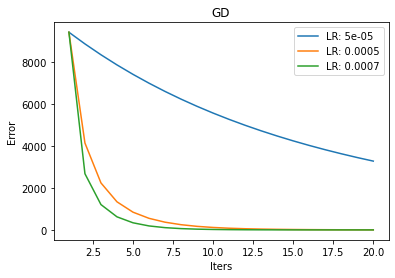

In [48]:
for lr in lr_list:
    df = gdSolver(path, kmax, lr, -1, 'GD', 0.00000001)
    print('LR {}-------------'.format(lr))
    print('Error: ',df.iloc[-1, -3])
    print('F*: ',df.iloc[-1, -2])
    print('e_n: ', df.iloc[-1, -1])
    print('Iters: ', df.iloc[-1, 0])
    plt.plot(np.arange(1,21), df.loc[:19, 'Error'], label = 'LR: {}'.format(lr))

plt.title('GD')
plt.xlabel('Iters')
plt.ylabel('Error')
plt.legend()
plt.show()

In [45]:
df

,Iter,Xn,Pk,Error,F*,E_n
0,1,"[[0.3316941], [-0.6351221], [-1.0072078], [-0....","[[473.848711], [-907.3172827], [-1438.8682709]...",1.033896e+04,8932.766573,3.383966
1,2,"[[0.3280242], [-0.8528846], [-1.0432093], [-0....","[[-5.2427527], [-311.0893388], [-51.4307426], ...",2.682892e+03,2059.102206,1.659508
2,3,"[[0.3818924], [-0.970867], [-1.0502287], [-0.2...","[[76.9546023], [-168.5462689], [-10.0276525], ...",1.129881e+03,732.466483,0.904350
3,4,"[[0.4067345], [-1.0294088], [-1.0551917], [-0....","[[35.488689], [-83.6311267], [-7.0899912], [-6...",5.696785e+02,382.953220,0.523940
4,5,"[[0.4228596], [-1.0594202], [-1.060311], [-0.3...","[[23.0359538], [-42.8734097], [-7.3133458], [-...",3.116862e+02,276.369974,0.326786
5,6,"[[0.4317988], [-1.0750997], [-1.0642234], [-0....","[[12.7702601], [-22.3993294], [-5.5891352], [-...",1.783905e+02,241.053548,0.230548
6,7,"[[0.4369373], [-1.0834798], [-1.066922], [-0.3...","[[7.3406963], [-11.9714702], [-3.8551074], [-1...",1.050212e+02,228.719204,0.190542
7,8,"[[0.4398359], [-1.0880688], [-1.0686593], [-0....","[[4.1407734], [-6.5558157], [-2.4819291], [-8....",6.300211e+01,224.256585,0.177511
8,9,"[[0.4414763], [-1.0906438], [-1.0697388], [-0....","[[2.3434694], [-3.6785633], [-1.5420525], [-5....",3.829244e+01,222.601671,0.174804
9,10,"[[0.4424026], [-1.0921234], [-1.0703946], [-0....","[[1.3232612], [-2.1137209], [-0.936861], [-3.2...",2.349455e+01,221.976887,0.175229


##### Parte 3 - SGD

In [ ]:
lr_list = [0.0005, 0.005, 0.01]
x_0 = np.zeros_like(x_true)
kmax = 1000

In [ ]:
for lr in lr_list:
    df = gdSolver(path, kmax, lr, -1, 'SGD', 0.00000001)
    print('LR {}-------------'.format(lr))
    print('Error: ',df.iloc[-1, -3])
    print('F*: ',df.iloc[-1, -2])
    print('e_n: ', df.iloc[-1, -1])
    print('Iters: ', df.iloc[-1, 0])

    plt.plot(np.arange(1,21), df.loc[:19, 'Error'], label = 'LR: {}'.format(lr))

plt.title('SGD')
plt.xlabel('Iters')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
df

##### Parte 4 - MiniBatch-GD

In [ ]:
lr_list = [0.0005, 0.005, 0.01]
mb_list = [25, 50, 100]
x_0 = np.zeros_like(x_true)
kmax = 1000

In [ ]:
for lr in lr_list:
    print('LR {}-------------'.format(lr))
    for mb in mb_list:
        df = gdSolver(path, kmax, lr, -1, 'MBGD', 0.00000001)
        print('MB {}-------------'.format(mb))
        print('Error: ',df.iloc[-1, -3])
        print('F*: ',df.iloc[-1, -2])
        print('e_n: ', df.iloc[-1, -1])
        print('Iters: ', df.iloc[-1, 0])

        plt.plot(np.arange(1,21), df.loc[:19, 'Error'], label = 'MB_size: {}'.format(mb))

    plt.title('MB-GD LR = {}'.format(lr))
    plt.xlabel('Iters')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

#### Metodo de Newton

##### Parte 1 - GD con Backtracking line search

In [49]:
def evalRosenbrockFunction(x0):
    x = x0[0, 0]
    y = x0[1, 0]
    rsb_function = '100*((y-x**2)**2) + (1 - x)**2'
    result = eval(rsb_function, {}, {'x': x, 'y': y})
    return result

In [50]:
def backTrackingLineSearch(x_0, lr, ro, c):
    x_k = x_0
    condition = True

    while condition:
        gradient = getRosenbrockGradient(x_k)
        x_k1 = x_k - (lr * gradient)

        fk_1 = evalRosenbrockFunction(x_k1)
        f_k = evalRosenbrockFunction(x_k)
        rhs = c * lr * np.matmul(gradient.T, -gradient)

        condition = (fk_1 > (f_k + rhs)) #the loop is the negated condition of the backtracking algorithm
        lr *= ro

    return lr

In [51]:
def rosenbrock_backtracking(x_0, kmax, epsilon, alpha, ro = 0.5, c = 0.0001, lr_type = 'backtracking'):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}

    if lr_type == 'backtracking':
        lr = backTrackingLineSearch(x_k, alpha, ro, c)
    else: #else it would be constant
        lr = alpha

    while k < kmax and error > epsilon:
        gradient = getRosenbrockGradient(x_k)
        x_k1 = x_k - (lr * gradient)

        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient, 2)

        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(-1 * gradient.round(7))
        data['Error'].append(error.round(7))

    results = pd.DataFrame(data)
    return results, lr

In [52]:
x_array = [np.array(['0', '0']), np.array(['0.6', '0.6']), np.array(['-0.5', '1']), np.array(['-1.2', '1'])]
x_0 = x_array[0]
epsilon = 0.00000001
kmax = 1000

alpha = 1 #0.0005
ro = 0.5
c = 0.0001

In [53]:
df, lr = rosenbrock_backtracking(x_0, kmax, epsilon, alpha, ro, c, 'backtracking')
print(lr)
df.tail()

0.0625


<string>:1: RuntimeWarning: overflow encountered in double_scalars
<string>:1: RuntimeWarning: invalid value encountered in double_scalars
<string>:1: RuntimeWarning: overflow encountered in double_scalars


,Iter,Xn,Pk,Error
4,5,"[[9863998.5459775], [67135.9413718]]","[[157825152.7490046], [1073627.2796407]]",1.578288e+08
5,6,"[[-2.399379848648041e+22], [1216230840666006.2]]","[[-3.839007757836867e+23], [1.9459693449581924...",3.839008e+23
6,7,"[[3.4533216383577694e+68], [7.19627957262287e+...","[[5.525314621372431e+69], [1.1514047316196592e...",5.525315e+69
7,8,"[[-1.0295586658192725e+207], [1.49067879224374...","[[-1.647293865310836e+208], [2.385086067589997...",1.647294e+208
8,9,"[[nan], [inf]]","[[nan], [inf]]",NaN


##### Parte 2 - Metodo de newton con Backtracking line search

In [ ]:
def getRosenbrockHessian(x0):
    x = x0[0, 0]
    y = x0[1, 0]
    g1 = eval('1200*(x**2) - 400*(y) + 2', {}, {'x': x, 'y': y})
    g2 = eval('-400*(x)', {}, {'x': x})
    hessian = np.array([g1, g2, g2, 200], dtype = 'float').reshape(2,2)

    return hessian

In [ ]:
def newton_optimization(x_0, kmax, epsilon, alpha, ro = 0.5, c = 0.0001, lr_type = 'backtracking'):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}

    if lr_type == 'backtracking':
        lr = backTrackingLineSearch(x_k, alpha, ro, c)
    else: #else it would be constant
        lr = alpha

    while k < kmax and error > epsilon:
        gradient = getRosenbrockGradient(x_k)
        hessian = getRosenbrockHessian(x_k)
        p_k = -1 * np.matmul(np.linalg.inv(hessian), gradient)
        x_k1 = x_k + (lr * p_k)

        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient, 2)

        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(p_k.round(7))
        data['Error'].append(error.round(7))

    results = pd.DataFrame(data)
    return results, lr

In [ ]:
x_array = [np.array(['0', '0']), np.array(['0.6', '0.6']), np.array(['-0.5', '1']), np.array(['-1.2', '1'])]
x_0 = x_array[0]
epsilon = 0.00000001
kmax = 3000

alpha = 1
ro = 0.5
c = 0.0001

In [ ]:
df, lr = newton_optimization(x_0, kmax, epsilon, alpha, ro, c, 'backtracking')
print(lr)
df.tail()